In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
#These are basic library so no need for explaination 

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
#This is done to make the model making process smoother nothing else 

In [3]:
import cv2 
import os 
import PIL
import pathlib
#So let me explain the use of these libraries 

In [4]:
#Use of os library 
#os library will help us to intract with operating system aka will help to import and export the dataset from the storage of kaggle 

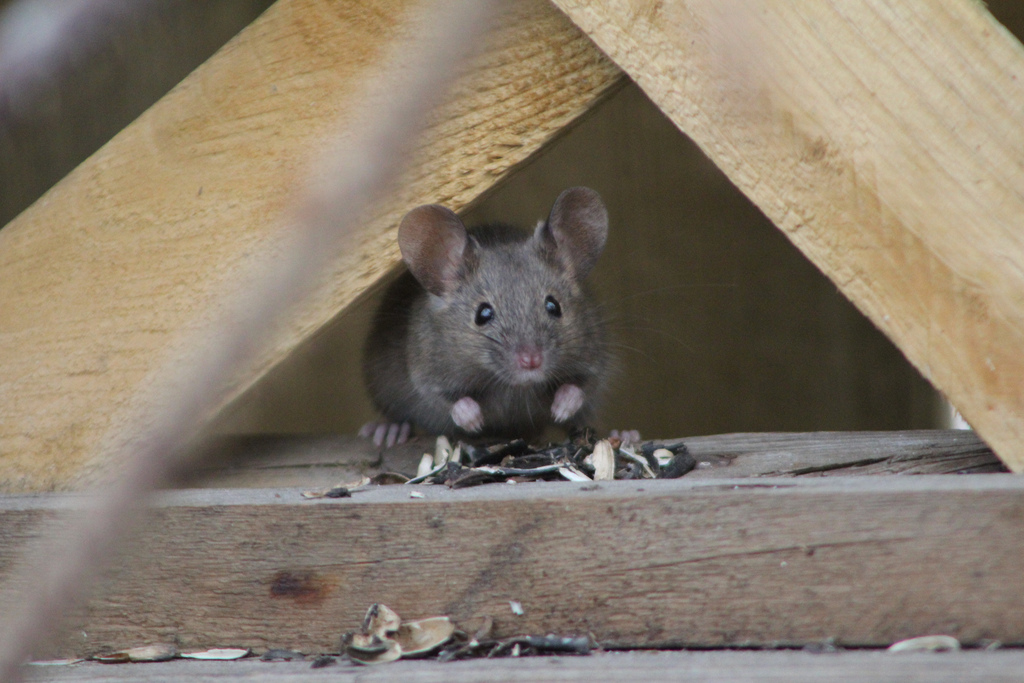

In [5]:
#Use of Pillow library aka PIL library 
PIL.Image.open("/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/test/00003.jpg")

In [6]:
#As u can see above that it will help us to show the images by inputing image path 

In [7]:
#Use of cv2 library 
#it is will help us to manipulate and read image pixels .

In [8]:
#Use of pathlib library 
#It is will help us to categorize the data for the model to learn 

In [9]:
data_dir="/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train"
#This is will help us later for categorization by the use of pathlib library 

In [10]:
data_dir=pathlib.Path(data_dir)
data_dir
#As you can see data_dir has now been converted to a posixpath which is better for us than simple string str path before 
#This posixpath seemed interesting to me and i will talk about it in post_thoughts 

PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train')

In [11]:
list(data_dir.glob('*/*.jpg'))[:5]
#As you can see glob function has helped us to categorize all files with ".jpg" in train directory 

[PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/wolf/03913.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/wolf/08162.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/wolf/00680.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/wolf/03154.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/wolf/00802.jpg')]

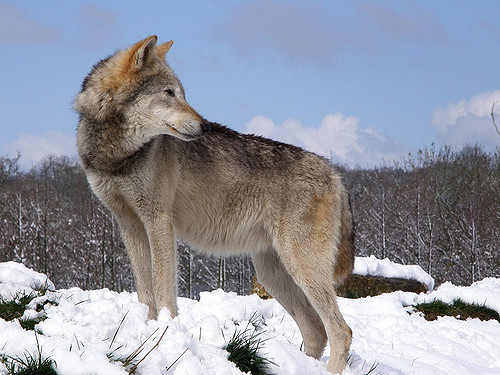

In [12]:
PIL.Image.open(str(list(data_dir.glob('*/*.jpg'))[0]))
#We have to type cast the posixpath to str as it is  a posixpath object not a string type.

In [13]:
image_count=len(list(data_dir.glob('*/*.jpg')))
#Self explainatory 

In [14]:
#As the folders are a lot and writting them with brute force will take a lot of time so we will make a for loop containing name of all folders but first we have to make a list with all folder names 
folder_names = [item.name for item in data_dir.iterdir() if item.is_dir()]
#item.name will give the item's name 
#data_dir.iterdir() will iterate over the directory with the path in data_dir which already contains the posixpath to train directory 
#"if item.is_dir()" will check if the item is directory or not 

# Print the folder names
print(folder_names)

['wolf', 'antelope', 'hamster', 'skunk', 'lion', 'otter', 'giant+panda', 'raccoon', 'hippopotamus', 'bobcat', 'pig', 'rat', 'spider+monkey', 'buffalo', 'mouse', 'tiger', 'bat', 'grizzly+bear', 'dalmatian', 'killer+whale', 'siamese+cat', 'humpback+whale', 'chihuahua', 'beaver', 'polar+bear', 'german+shepherd', 'elephant', 'zebra', 'seal', 'cow', 'ox', 'mole', 'giraffe', 'persian+cat', 'dolphin', 'blue+whale', 'leopard', 'deer', 'weasel', 'walrus']


In [15]:
#now we will create the dataset to be used for making a input array for our model
# It will help us in mapping dataset of x and y later 
animals_dataset={}
for i in folder_names:
    if("+" in i):
        i_new=i.replace('+',' ')
        animals_dataset[f"{i_new}"] = list(data_dir.glob(f'{i}/*'))
    else:
        animals_dataset[f"{i}"] = list(data_dir.glob(f'{i}/*'))
#Here i have paid close attention that animals with two word names should not contain as given in dataset so it more presentable 
#Now we will make a label list for making of output array
animals_label=[]
for i in folder_names:
    if('+' in i):
        name_new=(i).replace('+',' ')
        animals_label.append(name_new)
        continue 
    else:
        animals_label.append(i)
#It will help in getting the name of animal related to the number. 

In [16]:
img=cv2.imread('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/train/antelope/00044.jpg')
img.shape
#This will convert a img from its path to a 3d array that has his value of rgb color.
#Here shape function gives the value of number of pixels in x,y and lastly 3 tells us that it contains different value of rgb combinations 
#This will help us to provide input to the model

(622, 1024, 3)

In [38]:
x=[]
y=[]
for i in animals_dataset:
    for j in animals_dataset[i]:
        img=cv2.imread(str(j))#Reading its rgb combination and converting it into a 3d array 
        img= cv2.resize(img ,(224,224))#As all the images have different size , we have to resize the image by cv2 library.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x.append(img)
        y.append(animals_label.index(i))
#Here we are making x and y where x contains the 3d array of its rgb combination and y contains its related number of its animal name .
#After trial and error it seems the cap is 200 by 200 without crossing the RAM limit

In [39]:
x=np.array(x)
y=np.array(y)
#Converting the list into numpy arrays as tensorflow takes arrays


In [40]:
x_train, x_test , y_train , y_test = train_test_split(x,y,random_state=0 ,test_size=0.2)
#Self explainatory 


In [45]:
from tensorflow.keras.applications.resnet import preprocess_input
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


In [21]:
from tensorflow.keras.applications import ResNet50

In [22]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [23]:
data_augmentation = keras.Sequential([  
    layers.RandomFlip("horizontal", input_shape=(150, 150,3)),
    layers.RandomRotation(1),
    layers.RandomZoom(1),])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
  resnet_base , 
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5) ,
  layers.Dense(40 , activation ='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4) ,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)
#As this model is subject to change so i am not putting comments in it 

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.3568 - loss: 2.8916
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.7655 - loss: 0.8259
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8338 - loss: 0.5245
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8749 - loss: 0.4163
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9059 - loss: 0.2866
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9103 - loss: 0.2720
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9147 - loss: 0.2712
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9334 - loss: 0.2243
Epoch 9/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9269 - loss: 0.2251
Epoch 10/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9412 - loss: 0.1771


In [48]:
model.evaluate(x_test,y_test)
#Here we are evaluating our model on the test set made from our own

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8412 - loss: 0.7057


[0.6643940806388855, 0.8486118316650391]

In [50]:
test_dir=pathlib.Path("/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/test")
test_images = [item.name for item in test_dir.iterdir()]
test_images.sort()
testing=[]
for i in test_images:
    arr=cv2.imread(f"/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/test/{i}")
    arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    arr=cv2.resize(arr,(224,224))
    arr = preprocess_input(arr)
    testing.append(arr)
testing=np.array(testing)
predictions=model.predict(testing)
csv_class=[]
for i in range(len(test_images)):
    csv_class.append(animals_label[np.argmax(predictions[i])])
df = pd.DataFrame({
    "image_id": test_images ,
    "class" : csv_class } )
df.to_csv("predictions.csv", index=False)


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step


In [52]:
df.to_csv("predictions.csv", index=False)